In [4]:
# Intro to Data Science Final Project
# Maintenance Window / Deployment Window Scheduler
# ____________________________________________________________
# authored by: Sean Cox, Orion Collins, and Anthony Morganelli

import pandas as pd
import numpy as np

# import data
df = pd.read_excel("Routine_Analytics.xlsx")
df = df[['recurweeklyonsunday','recurweeklyonmonday','recurweeklyontuesday','recurweeklyonwednesday','recurweeklyonthursday','recurweeklyonfriday','recurweeklyonsaturday','recuronceondate','recuryearlyonday','runathour','runatminute','startdate']]
df = df.rename(columns={'recurweeklyonsunday':'Sunday', 'recurweeklyonmonday':'Monday','recurweeklyontuesday':'Tuesday','recurweeklyonwednesday':'Wednesday','recurweeklyonthursday':'Thursday','recurweeklyonfriday':'Friday','recurweeklyonsaturday':'Saturday'})

df[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']] = df[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']].fillna(0)

#shows that no jobs occur just yearly, we either have weekly or one-time jobs
#hourly[hourly['recuryearlyonday'].notnull()]

#create mapping for weekday conversion of int
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#create column to track weekday for onetime jobs 
df['weekday'] = df[df['recuronceondate'] == df['startdate']]['recuronceondate'].dt.dayofweek.map(dayOfWeek)

#increment each column where there was a onetime job on the dow
df.loc[df['weekday'] == 'Sunday','Sunday'] += 1
df.loc[df['weekday'] == 'Monday','Monday'] += 1
df.loc[df['weekday'] == 'Tuesday','Tuesday'] += 1
df.loc[df['weekday'] == 'Wednesday','Wednesday'] += 1
df.loc[df['weekday'] == 'Thursday','Thursday'] += 1
df.loc[df['weekday'] == 'Friday','Friday'] += 1
df.loc[df['weekday'] == 'Saturday','Saturday'] += 1

In [2]:
# now we need to determine when during the week is the best time to perform updates and maintenance based
# on the above information. grouping based on date and time may be a good start.
weekly_df = df
#looking at which days have the most routines during the week
weekly_df = weekly_df.drop(columns={'recuryearlyonday', 'runathour','runatminute','weekday'})
weekly_sum = pd.DataFrame(weekly_df.sum()).unstack(level=1)
weekly_sum = weekly_sum.sort_values()
weekly_sum = weekly_sum.reset_index()
weekly_sum = pd.DataFrame(weekly_sum)
weekly_sum = weekly_sum.rename(columns={0:'Sum', 'level_1':'Day'})
weekly_sum = weekly_sum.drop(columns={'level_0'}).set_index('Day')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

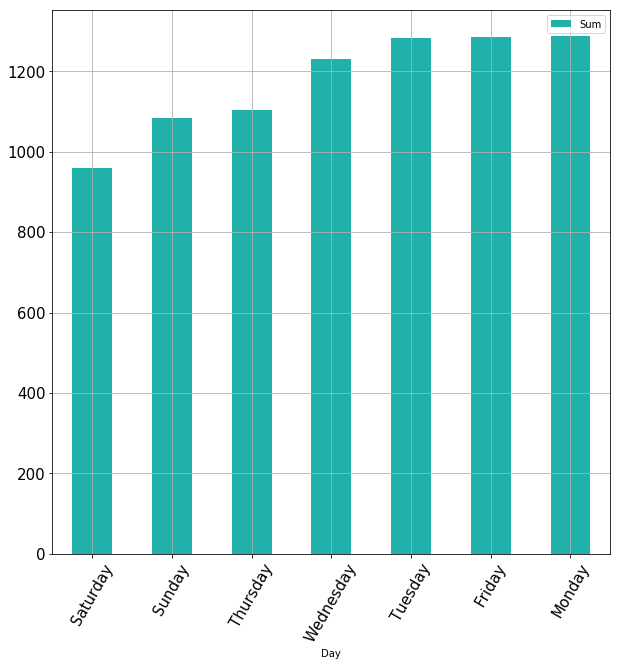

In [10]:
import matplotlib.pyplot as plt

weekly_sum.plot(kind='bar', y='Sum', color='lightseagreen', figsize=(10,10), grid=True, fontsize=15)
plt.xticks(rotation=60)

In [7]:
weekly_sum.idxmin()

Sum    Saturday
dtype: object

In [6]:
hourly = df

In [139]:
#get rows where there is at least one run on saturday, group by runs, count them, and sort them
saturday = hourly.loc[hourly['Saturday'] > 0,['Saturday','runathour']].groupby('runathour').count().sort_values(by='Saturday')
saturday = saturday.rename(columns={'Saturday':'# Runs'}).rename_axis('Hour')
saturda7y

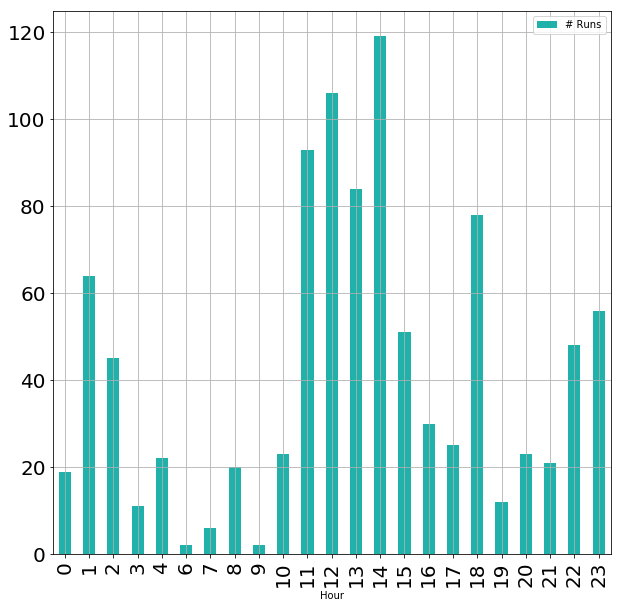

In [24]:
saturday_plot = saturday.plot(kind='bar', y='# Runs', color='lightseagreen', figsize=(10,10), grid=True, fontsize=20)

([<matplotlib.axis.XTick at 0x7fa93da14b70>,
 <a list of 24 Text xticklabel objects>)

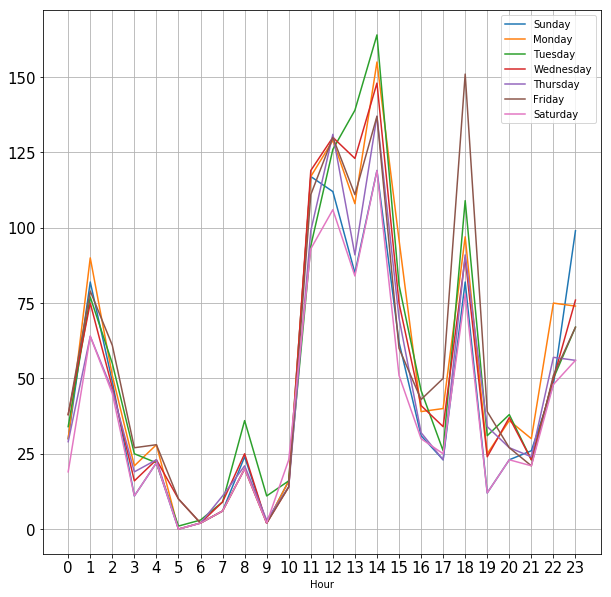

In [208]:
#show traffic pattern over the course of the week
dfSun= hourly.loc[hourly['Sunday']==1,['Sunday','runathour']].groupby('runathour').count().sort_values(by='Sunday')
dfMon=hourly.loc[hourly['Monday']==1,['Monday','runathour']].groupby('runathour').count().sort_values(by='Monday')
dfTue= hourly.loc[hourly['Tuesday']==1,['Tuesday','runathour']].groupby('runathour').count().sort_values(by='Tuesday')
dfWed= hourly.loc[hourly['Wednesday']==1,['Wednesday','runathour']].groupby('runathour').count().sort_values(by='Wednesday')
dfThu= hourly.loc[hourly['Thursday']==1,['Thursday','runathour']].groupby('runathour').count().sort_values(by='Thursday')
dfFri= hourly.loc[hourly['Friday']==1,['Friday','runathour']].groupby('runathour').count().sort_values(by='Friday')
dfSat= hourly.loc[hourly['Saturday']==1,['Saturday','runathour']].groupby('runathour').count().sort_values(by='Saturday')

totDF = pd.concat([dfSun,dfMon,dfTue,dfWed,dfThu,dfFri,dfSat],axis=1,sort=True).fillna(0).rename_axis('Hour')
week_by_hour=totDF.plot(kind='line',y=totDF.columns,grid=True, figsize=(10,10), fontsize=15).fill_between(totDF.index,totDF.iloc[:,0],alpha=.2)
plt.xticks(np.arange(24))

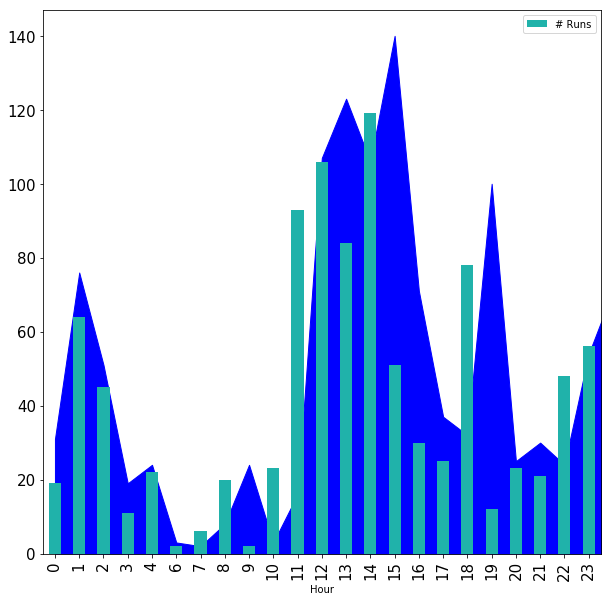

In [206]:
#display traffic avg traffic pattern over saturady.
saturday = saturday.sort_values(by='Hour',ascending=True)
meanDF = totDF.mean(axis=1)
meanDF = pd.DataFrame(data=meanDF.values.round(0), columns=['Hours'])

saturday_hourly = saturday.plot(kind='bar',y='# Runs', color='lightseagreen', figsize=(10,10), fontsize=15).fill_between(meanDF.index,meanDF.iloc[:,0],color='blue',alpha=.5)

In [ ]:
#saturday
#hourly